In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

ImportError: cannot import name 'SymmetryUndeterminedError' from 'pymatgen.symmetry.analyzer' (/home/modl/maurom/.local/lib/python3.9/site-packages/pymatgen/symmetry/analyzer.py)

In [1]:
mp_key = "23hOiKlEoGQW353WjxM4GcQtg20eKzYt"
mp_id = "mp-10969"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

MPRestError: HTTPConnectionPool(host='api.materialsproject.org', port=80): Max retries exceeded with url: /materials/summary/?material_ids=mp-10969&_fields=structure&_per_page=1000&_page=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f67c8204250>: Failed to establish a new connection: [Errno 110] Connection timed out'))

In [ ]:
print("Les 3 vecteurs de bases des son réseau direct sont:")
print(prim_struc.lattice)

Pour rappel, les vecteurs de bases du réseau réciproque se trouvent à partir des vecteurs du réseau direct et du volume de la maille.
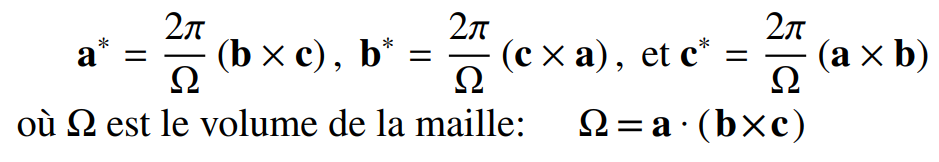

In [8]:
print("Les 3 vecteurs de bases de son réseau réciproque sont:")
print(prim_struc.lattice.reciprocal_lattice)

Les 3 vecteurs de bases de son réseau réciproque sont:
1.613718 -0.570535 0.000000
0.000000 1.711606 0.000000
-0.806859 -0.570536 1.397521


In [9]:
print("son type maille est :",SpacegroupAnalyzer(prim_struc).get_lattice_type())
print("son systeme crystallin est :",SpacegroupAnalyzer(prim_struc).get_crystal_system())
print("son groupe ponctuel est :",SpacegroupAnalyzer(prim_struc).get_point_group_symbol())

son type maille est : cubic
son systeme crystallin est : cubic
son groupe ponctuel est : -43m


Le groupe ponctuel -43m signifie que pour trouver chacun des atomes à partir d'un, on doit utiliser une roto-inversion d'ordre 4, suivi d'une inversion d'ordre 3 et une réflexion.